In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext rpy2.ipython

import ipyparallel as ipp
import matplotlib.pyplot as plt
import msprime
import numpy as np
import pandas as pd
import PIED
import toytree

from collections import Counter
from IPython.display import display, SVG

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

ipyclient = ipp.Client(cluster_id="cannabis")
len(ipyclient)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


40

In [2]:
tree = PIED.Core("sims")
tree.set_param("ntaxa", 100)
tree.set_param("abundance_mean", 1e7)
tree.set_param("ClaDS", "True")
tree.set_param("ClaDS_sigma", 0.2)
tree.set_param("ClaDS_alpha", 0.95)
tree.set_param("sequence_length", 1000)
tree.set_param("mutation_rate", 1e-8)
_ = tree.get_params(verbose=True)

------- PIED params file (v.0.0.2)----------------------------------------------
sims                 ## [0] [simulation_name]: The name of this simulation scenario
./default_PIED       ## [1] [project_dir]: Where to save files
1                    ## [2] [birth_rate]: Speciation rate
taxa                 ## [3] [stop_criterion]: Whether to stop on ntaxa or time
100                  ## [4] [ntaxa]: Number of taxa to simulate if stop is `ntaxa`
4                    ## [5] [time]: Amount of time to simulate if stop is `time`
abundance            ## [6] [process]: Whether to evolve `abundance` or growth `rate` via BM
True                 ## [7] [ClaDS]: Whether to allow speciation rates to change along the branches a la ClaDS
10000000             ## [8] [abundance_mean]: Ancestral abundance at time 0
0.1                  ## [9] [abundance_sigma]: Rate at which abundance changes if process is `abundance`
0                    ## [10] [growth_rate_mean]: Ancestral population growth rate at t

In [3]:
tree.simulate(nsims=10, ipyclient=ipyclient)

    Generating 10 simulation(s).
  [####################] 100%  Finished 10 simulations in   0:00:10| 
 

(0, 0.1)

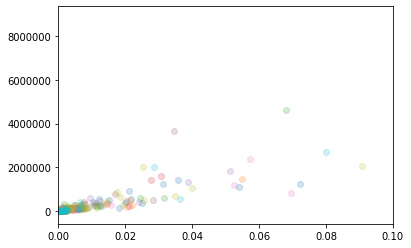

In [18]:
simfile = "/home/isaac/PIED/jupyter-notebooks/default_PIED/sims-SIMOUT.csv"
df = pd.read_csv(simfile, header=0, sep=" ")
sims = []
for rec in df["data(name:abundance:pi:r:lambda)"]:
# split the records for each species, separated by ','
    dat = rec.split(",")
    dat = {x:{"abundance":int(y), "pi":float(z), "r":float(aa), "lambda_":float(bb)} for x, y, z, aa, bb in map(lambda x: x.split(":"), dat)}
    sims.append(dat)
df = pd.DataFrame(sims)

for idx, i in enumerate(df.iterrows()):
    pis = []
    abunds = []
    # x is the data dict {species_name:data}
    for x in i[1]:
        if isinstance(x, dict):
            if x["pi"] < 1:
                pis.append(x["pi"])
                abunds.append(x["abundance"])
    pis = np.array(pis)
    ys = np.arange(0, len(pis))
    #plt.semilogy(ys, sorted(pis, reverse=True))
    plt.scatter(pis, abunds, alpha=0.2)
plt.xlim(0, 0.1)

In [19]:
tre, res = tree._simulate()

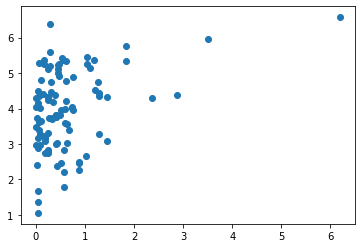

In [20]:
tips = tre.treenode.get_leaves()

ages = [x.dist for x in tips]
pis = [x.pi for x in tips]
abunds = [x.abundance for x in tips]

plt.scatter(ages, np.log10(abunds))

(0, array(0.17257778))

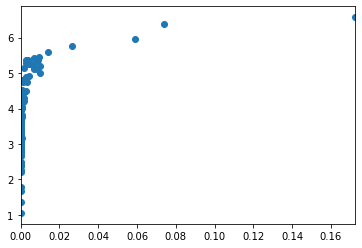

In [21]:
plt.scatter(pis, np.log10(abunds))
plt.xlim(0, max(pis))

(array([ 2.,  1.,  1.,  7.,  6., 11.,  8., 14., 15.,  7.,  8., 15.,  2.,
         1.,  2.]),
 array([1.04139269, 1.41128759, 1.7811825 , 2.1510774 , 2.52097231,
        2.89086722, 3.26076212, 3.63065703, 4.00055193, 4.37044684,
        4.74034175, 5.11023665, 5.48013156, 5.85002647, 6.21992137,
        6.58981628]),
 <a list of 15 Patch objects>)

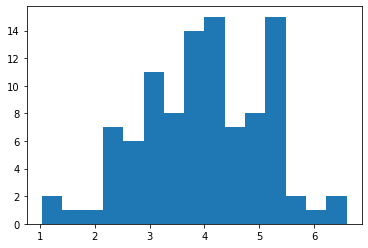

In [22]:
plt.hist(np.log10(abunds), bins=15)

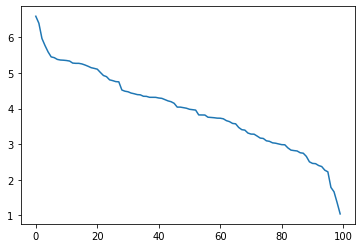

In [23]:
xs = np.arange(0, len(abunds))
ys = sorted(np.log10(abunds), reverse=True)
plt.plot(xs, ys)

In [24]:
tre.draw(tip_labels="r")

(<toyplot.canvas.Canvas at 0x7fa829735cc0>,
 <toyplot.coordinates.Cartesian at 0x7fa829735d68>)

<svg class="toyplot-canvas-Canvas" height="1000.0px" id="t1e6cb08be50a48f2a49ae00fa0eaca49" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 265.0 1000.0" width="265.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 r16 r17 r18 r19 r20 r21 r22 r23 r24 r25 r26 r27 r28 r29 r30 r31 r32 r33 r34 r35 r36 r37 r38 r39 r40 r41 r42 r43 r44 r45 r46 r47 r48 r49 r50 r51 r52 r53 r54 r55 r56 r57 r58 r59 r60 r61 r62 r63 r64 r65 r66 r67 r68 r69 r70 r71 r72 r73 r74 r75 r76 r77 r78 r79 r80 r81 r82 r83 r84 <text style="fill:rgb(14.9%,14.9%,14.9%);fill-opacity:1.0;font-family:helvetica;font-size:11.